<a href="https://colab.research.google.com/github/Samapti25/solar/blob/main/carringtonmaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive

In [ ]:
!git clone https://github.com/Samapti25/solar.git


In [ ]:
drive.mount('/content/drive')

In [ ]:
!pip install astropy


In [ ]:
!pip install sunpy[all]

In [ ]:
import os
from astropy.io import fits
import sunpy.map
from sunpy.coordinates import NorthOffsetFrame
import astropy.units as u
import numpy as np
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames
import matplotlib.pyplot as plt
import matplotlib.colors
import glob
from scipy import ndimage
import numpy as np
import sunpy.timeseries
import scipy.ndimage as ndimage
from scipy.ndimage import label
from scipy.optimize import curve_fit





In [5]:
folder_path = "/content/drive/MyDrive/data folder"
save_dir1="/content/drive/MyDrive/data folder/South hemisphere"
save_dir2= "/content/drive/MyDrive/data folder/North hemisphere"
files = os.listdir(folder_path)
fits_files = glob.glob(os.path.join(folder_path, '*.fits'))
print(fits_files)

['/content/drive/MyDrive/data folder/synop_Mr_0.1960.fits']


In [6]:
for file in fits_files:
  with fits.open(file)as f:
    header = f[0].header
    data=f[0].data
    #print(header)
    #print(data)

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.imshow(data, origin="lower", cmap='gray', aspect=2)
plt.colorbar()

In [7]:
nx=data.shape[1]
ny=data.shape[0]



In [8]:
latitude=[]
longitude=[]
sinlat=[]
flux=[]
R_sun = 6.96e10


print(ny)
for i in range (ny):
  sin_lat= -1+i*(2/(ny-1))

  Latitude =np.arcsin(sin_lat)*(180/np.pi)
  latitude.append(Latitude)
  sinlat.append(sin_lat)

for j in range(nx):
  Longitude = 0+j*(360/(nx-1))
  longitude.append(Longitude)












1080


In [9]:
lon=np.array(longitude)
lat=np.array(latitude)
sinlat=np.array(sinlat)

In [ ]:
fig = plt.figure(figsize=(12,6))

X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,data, cmap='gray')
fig=plt.figure(figsize=(12,6))

plt.imshow(data,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()



fig=plt.figure(figsize=(12,6))
x,y=np.meshgrid(lon, lat )
plt.pcolormesh(x,y,data, cmap='gray')


In [10]:
mask=(lat >=-65) & (lat<=65)
crop_data= data[mask, :]
crop_lat=lat[mask]

In [ ]:
fig=plt.figure(figsize=(12,6))
Lon,Lat=np.meshgrid(lon, crop_lat )
plt.pcolormesh(Lon,Lat,crop_data, cmap='gray')
plt.colorbar()

In [42]:
longitude=[]
sinlat=[]
latitude=[]
colatitude =[]
sincolatitude=[]
flux=[]
flux_rad1 =[]
flux_rad2 =[]
Area1=[]
Area2=[]
R_sun = 6.96e10
d_sinlat=2/(ny-1)



for i in range (ny):
  sin_lat= -1+i*(2/(ny-1))
  d_sinlat=2/(ny-1)
  dtheta_rad=np.arcsin(d_sinlat)
  d_theta= np.arcsin(d_sinlat)*(180/np.pi)
  d_colat=90-(d_theta)
  dcolat_rad=(d_colat*np.pi)/180


  Latitude =np.arcsin(sin_lat)*(180/np.pi)
  Latitude_rad=  (Latitude*np.pi)/180
  colat=90-(Latitude)
  colat_rad = (colat*np.pi)/180

  latitude.append(Latitude)
  sinlat.append(sin_lat)
  colatitude.append(colat)

  for j in range(nx):
    Longitude = 0+j*(360/(nx-1))
    d_lon=360/(nx-1)
    dlon_rad=(d_lon*np.pi)/180

    longitude.append(Longitude)
  b= data[i]
  area1=np.sin(colat_rad)*(R_sun**2)*(dcolat_rad)*(dlon_rad)
  area2=np.cos(Latitude_rad)*(R_sun**2)*(dtheta_rad)*(dlon_rad)
  Area1.append(area1)
  Area2.append(area2)

  phi_rad1=(b)*np.sin(colat_rad)*(R_sun**2)*(dcolat_rad)*(dlon_rad)
  phi_rad2=(b)*area2

  flux_rad1.append(phi_rad1)
  flux_rad2.append(phi_rad2)
flux=(data)*(R_sun**2)*(d_sinlat)*(dlon_rad)
S= (R_sun**2)*(d_sinlat)*(dlon_rad)
print(S)
print(latitude[:5])
#print(flux)
print(d_theta)
print(dtheta_rad)

1.5675631727393676e+16
[np.float64(-90.0), np.float64(-86.51093539256357), np.float64(-85.06495450619119), np.float64(-83.95489307264754), np.float64(-83.01863091772586)]
0.10620169105058827
0.001853569180018561


In [45]:
print(Area1[:5])
print(Area2[:5])

[np.float64(1624.9292314271856), np.float64(8.074981408644641e+17), np.float64(1.1414450265844261e+18), np.float64(1.3973297762676954e+18), np.float64(1.612747504195717e+18)]
[np.float64(0.959856160610801), np.float64(953988703261567.2), np.float64(1348517854901697.2), np.float64(1650823393677813.0), np.float64(1905320671783754.0)]


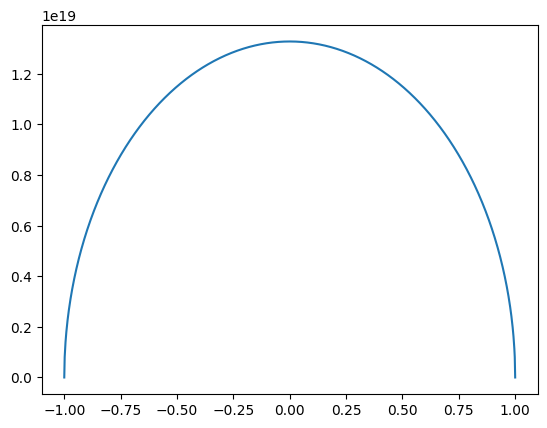

In [46]:
plt.plot(sinlat,Area1)

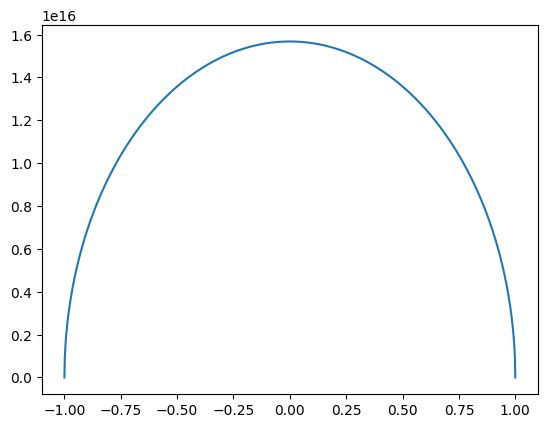

In [41]:

plt.plot(sinlat,Area2)

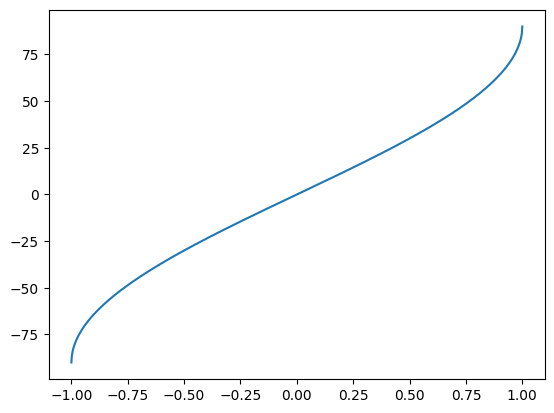

In [30]:
plt.plot(sinlat,latitude)

In [44]:
 print(flux_rad1[:5])
 print(flux_rad2[:5])
 print(flux[:5])

[array([-14624.36308284, -14136.88400349, -13324.41938777, ...,
       146568.62411307, 141531.33357786, 136494.05543988]), array([-2.70511877e+19, -2.78586859e+19, -2.85046838e+19, ...,
       -7.34823339e+18, -7.91348193e+18, -8.47873048e+18]), array([2.32854781e+19, 2.64815255e+19, 2.92209931e+19, ...,
       5.31913409e+19, 5.33054836e+19, 5.27347611e+19]), array([ 4.75092137e+18,  2.93439273e+18,  1.95626165e+18, ...,
       -1.39732980e+17,  4.19198933e+18,  9.08264355e+18]), array([-5.74138148e+19, -6.01554807e+19, -6.28971527e+19, ...,
        5.32206676e+19,  5.61236119e+19,  5.70912641e+19])]
[array([-8.63870545, -8.35074841, -7.87082033, ..., 86.57903008,
       83.60347012, 80.62791749]), array([-3.19586216e+16, -3.29126103e+16, -3.36758005e+16, ...,
       -8.68129756e+15, -9.34908947e+15, -1.00168814e+16]), array([2.75097637e+16, 3.12856153e+16, 3.45220576e+16, ...,
       6.28409351e+16, 6.29757849e+16, 6.23015259e+16]), array([ 5.61279970e+15,  3.46672936e+15,  2.311152

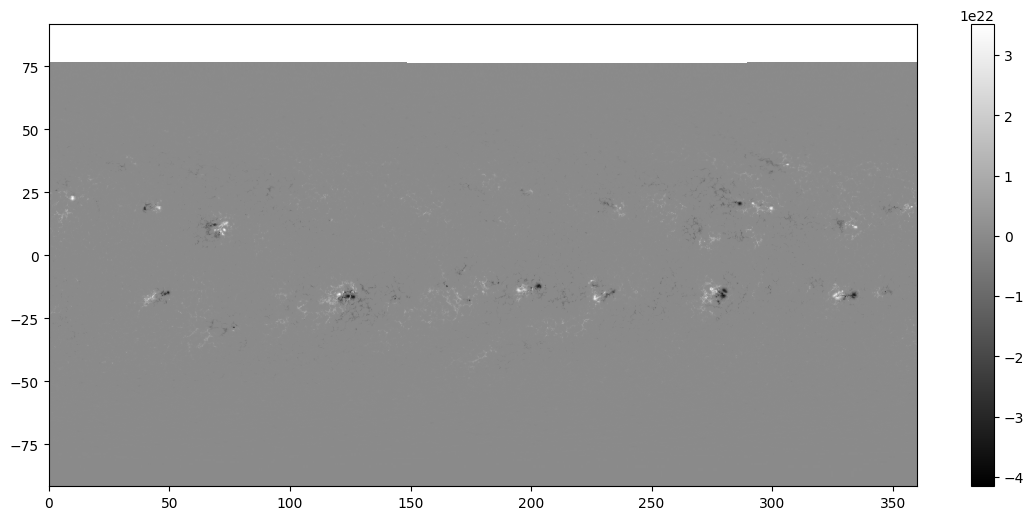

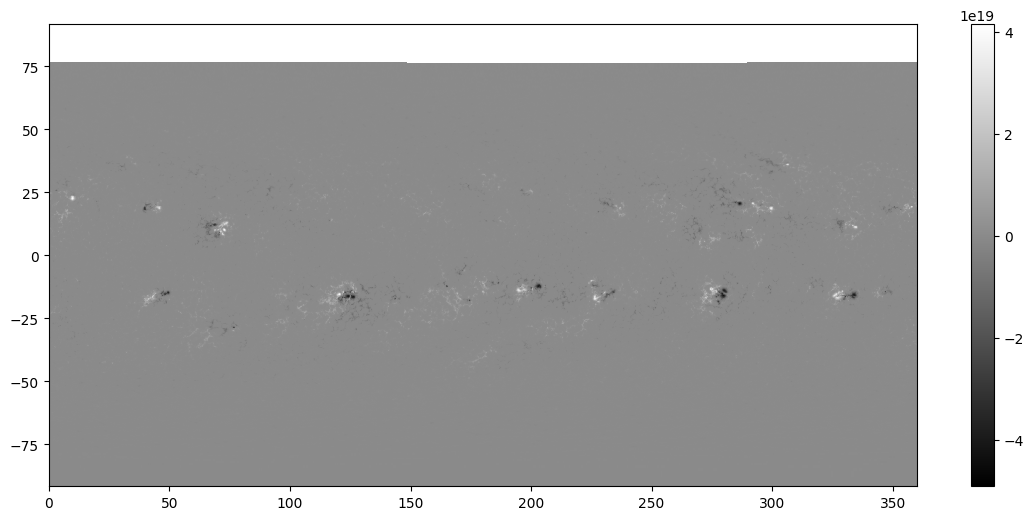

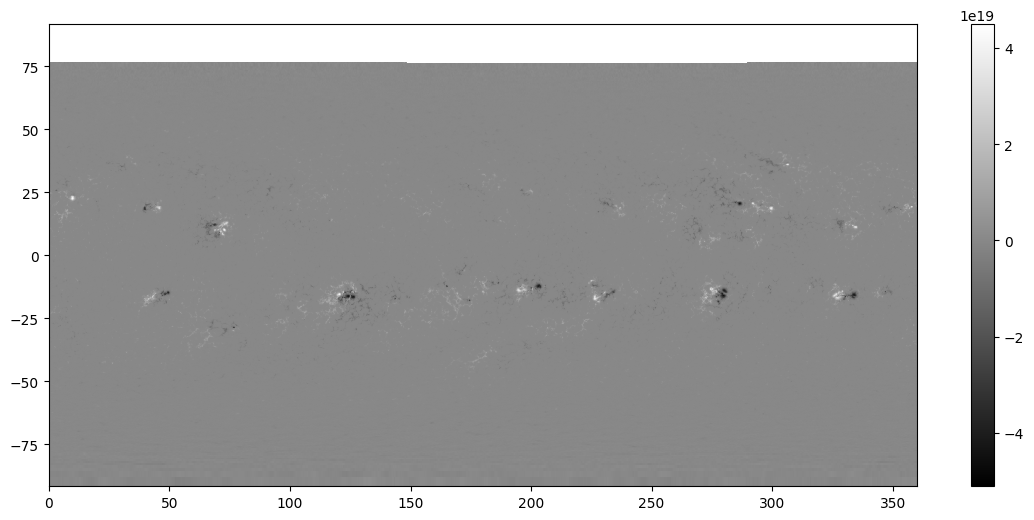

In [43]:



fig=plt.figure(figsize=(14,6))
x,y=np.meshgrid(lon, lat )
plt.pcolormesh(x,y,flux_rad1, cmap='gray')
plt.colorbar()


fig=plt.figure(figsize=(14,6))
x,y=np.meshgrid(lon, lat )
plt.pcolormesh(x,y,flux_rad2, cmap='gray')
plt.colorbar()

fig=plt.figure(figsize=(14,6))
x,y=np.meshgrid(lon, lat )
plt.pcolormesh(x,y,flux, cmap='gray')
plt.colorbar()

In [ ]:
fluxthres=1e19



binary_mask=np.abs(flux_rad)>fluxthres




In [ ]:

fig = plt.figure(figsize=(12,6))

x,y=np.meshgrid(lon, lat )
plt.pcolormesh(X,Y,binary_mask, cmap='gray')







In [ ]:
lon=np.array(longitude)
lat=np.array(latitude)
sinlat=np.array(sinlat)

In [ ]:
y_indices, x_indices = np.where(binary_mask==1)

Lat=lat[y_indices]
Lon=lon[x_indices]
mask1=(Lat<=0)& (Lat>=-90)
SH_LAT=Lat[mask1]
SH_LON=Lon[mask1]
mask2= (Lat<=90) & (Lat>=0)
NH_LAT = Lat[mask2]
NH_LON = Lon[mask2]

sorted_indices1= np.argsort(SH_LON)
SHlon_sorted=SH_LON[sorted_indices1]
SHlat_sorted=SH_LAT[sorted_indices1]
output1=np.column_stack((SHlon_sorted,SHlat_sorted))
#print(output1)
sorted_indices2 = np.argsort(NH_LON)
NHlon_sorted= NH_LON[sorted_indices2]
NHlat_sorted = NH_LAT[sorted_indices2]
output2 = np.column_stack((NHlon_sorted, NHlat_sorted))
#print(output2)



In [ ]:
base_name = os.path.basename(file).replace('.fits', '')
txt_name1= f" {base_name}_SH.txt"
txt1= os.path.join(save_dir1, txt_name1)
txt_name2= f" {base_name}_NH.txt"
txt2= os.path.join(save_dir2, txt_name2)
np.savetxt(txt1,output1)
np.savetxt(txt2, output2)

In [ ]:
folder_path3="/content/drive/MyDrive/data folder/North hemisphere"
files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
A=[]
B=[]
C=[]
for file in txt_files:
	print(file)

In [ ]:
with open (file, "r") as infile:
  for line in infile:
    parts=line.split()
    if len(parts)==2:
      fhi=float(parts[0])
      lamda=float(parts[1])
      lon_rad = (fhi*np.pi)/180
      A.append(fhi)
      B.append(lamda)
      C.append(lon_rad)




In [ ]:
N=np.array(A)

In [ ]:
def model(N,a,b,c):
  S= (N*np.pi)/180
  return a+b*np.sin(S+c)
params, Cov = curve_fit(model,N,B)
print(f"a = {params[0]}, b = {params[1]}, c={params[2]}")
print(Cov)

In [ ]:
plt.scatter (A,model(N, *params) )
X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,binary_mask2, cmap='gray')

In [ ]:
folder_path2="/content/drive/MyDrive/data folder/South hemisphere"
files = os.listdir(folder_path2)
txt_files = glob.glob(os.path.join(folder_path2, '*.txt'))
Y=[]
X=[]
Z=[]
for file in txt_files:
	print(file)


In [ ]:
with open (file, "r") as infile:
  for line in infile:
    parts=line.split()
    if len(parts)==2:
      fhi=float(parts[0])
      lamda=float(parts[1])
      lon_rad = (fhi*np.pi)/180
      A.append(fhi)
      B.append(lamda)
      C.append(lon_rad)




In [ ]:
def model(A,a,b,c):
  S= (A*np.pi)/180
  return a+b*np.sin(S+c)
params, Cov = curve_fit(model,A,B)
print(f"a = {params[0]}, b = {params[1]}, c={params[2]}")
print(Cov)

In [ ]:
plt.scatter (A,model(N, *params) )
X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,binary_mask2, cmap='gray')

**For testing**

In [ ]:
nx=data.shape[1]
ny=data.shape[0]
longitude=np.linspace(0,360,nx)
sin_lat=np.linspace(-1,1,ny)



In [ ]:
fig = plt.figure(figsize=(12,6))
plt.imshow(data, origin="lower", cmap='gray',extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()],aspect=100)
plt.colorbar()

In [ ]:

threshold=100
binary_mask=np.abs(data)>threshold
mask=(np.abs(data)>threshold)                                    #|(np.abs(data)==0)
crop_data=np.where(mask, data, 0)


In [ ]:
fig = plt.figure(figsize=(12,6))

X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,binary_mask, cmap='gray')
fig=plt.figure(figsize=(12,6))

plt.imshow(binary_mask,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()



fig=plt.figure(figsize=(12,6))
x,y=np.meshgrid(lon, lat )
plt.pcolormesh(x,y,binary_mask, cmap='gray')

In [ ]:
labeled_array, num_features = label(binary_mask)
sizes = ndimage.sum(binary_mask, labeled_array, range(1, num_features + 1))


In [ ]:
longitude=[]
sinlat=[]
latitude=[]
colatitude =[]
sincolatitude=[]
flux=[]
flux_rad =[]
R_sun = 6.96e10



for i in range (ny):
  sin_lat= -1+i*(2/(ny-1))
  d_sinlat=2/(ny-1)
  d_theta=np.arcsin(d_sinlat)*(180/np.pi)

  Latitude =np.arcsin(sin_lat)*(180/np.pi)
  colat=90-(Latitude)
  colat_rad = (colat*np.pi)/180

  latitude.append(Latitude)
  sinlat.append(sin_lat)
  colatitude.append(colat)

  for j in range(nx):
    Longitude = 0+j*(360/(nx-1))
    d_lon=360/(nx-1)

    longitude.append(Longitude)
  b= data[i]
  #phi=(b)*np.sin(colat)*(R_sun**2)*(d_theta)*(d_lon)
  phi_rad=(b)*np.sin(colat_rad)*(R_sun**2)*(d_theta)*(d_lon)
  #flux.append(phi)
  flux_rad.append(phi_rad)

#print(flux)

In [ ]:
fig = plt.figure(figsize=(12,6))

X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,flux_rad, cmap='gray')
plt.colorbar()

fig=plt.figure(figsize=(12,6))
plt.imshow(flux_rad,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()



fig=plt.figure(figsize=(14,6))
x,y=np.meshgrid(lon, lat )
plt.pcolormesh(x,y,flux_rad, cmap='gray')
plt.colorbar()

In [ ]:
longitude=[]
sinlat=[]
latitude=[]
colatitude =[]
sincolatitude=[]
flux=[]
flux_rad =[]
colatrad=[]
R_sun = 6.96e10



for i in range (ny):
  sin_lat= -1+i*(2/(ny-1))
  d_sinlat=2/(ny-1)
  d_theta=np.arcsin(d_sinlat)

  Latitude =np.arcsin(sin_lat)*(180/np.pi)
  colat=90-(Latitude)
  colat_rad = (colat*np.pi)/180
  colatrad.append(colat_rad)


  latitude.append(Latitude)
  sinlat.append(sin_lat)
  colatitude.append(colat)

  for j in range(nx):
    Longitude = 0+j*(360/(nx-1))
    d_lon=360/(nx-1)
    dlon_rad=(d_lon*np.pi)/180

    longitude.append(Longitude)
  b= data[i]
  #phi=(b)*np.sin(colat)*(R_sun**2)*(d_theta)*(d_lon)
  phi_rad=(b)*np.sin(colat_rad)*(R_sun**2)*(d_theta)*(dlon_rad)
  #flux.append(phi)
  flux_rad.append(phi_rad)

#print(flux)

In [ ]:
print[]

In [ ]:
diff=[]
for i in range(ny):
  diff_sinlat=  sinlat[i]- sinlat[i-1]
  diff.append(diff_sinlat)
print(diff[:5])

In [ ]:
plt.plot(sinlat,diff )

In [ ]:
diff=[]
for i in range(ny):
  if i==0:
     diff_colatrad= 0
  else:
    diff_colatrad=  colatrad[i-1]- colatrad[i]
  diff.append(diff_colatrad)
print(diff[1070:])

In [ ]:
plt.plot( sinlat, diff)

In [ ]:
with open (file, "r") as infile:
  for line in infile:
    parts=line.split()
    if len(parts)==2:
      lon=float(parts[0])
      lat=float(parts[1])
      lon_rad = (lon*np.pi)/180
      y=-0.25+0.02*np.sin(lon_rad)
      Y.append(y)
      X.append(lon)
      Z.append(lat)


In [ ]:

plt.imshow(mask_filtered, origin="lower", cmap="gray", extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()], aspect=100)
#x=np.linspace(0,360,60)
#y=np.sin(x)
plt.plot(X,Y)





In [ ]:
plt.plot(A,B)


In [ ]:
plt.plot(C,B)

In [ ]:
plt.plot(A,C)

In [ ]:
N=np.array(A)

In [ ]:
older_path3="/content/drive/MyDrive/data folder/North hemisphere"
files = os.listdir(folder_path3)
txt_files = glob.glob(os.path.join(folder_path3, '*.txt'))
A=[]
B=[]
C=[]

for file in txt_files:
	print(file)


In [ ]:
with open (file, "r") as infile:
    for line in infile:
      parts=line.split()
      if len(parts)==2:
        LON=float(parts[0])
        LAT=float(parts[1])
        lon_rad = (LON*np.pi)/180

        A.append(LON)
        B.append(LAT)
        C.append(lon_rad)

c=np.array(C)
y=17.4709+2.07006*np.sin(c+3.25956)

In [ ]:
print(len(A))
print(len(y))
print(len(c))

In [ ]:
fig = plt.figure(figsize=(12,6))

X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,binary_mask2, cmap='gray')

plt.plot(A,y, color="red")

In [ ]:
plt.imshow(mask_filtered, origin="lower", cmap="gray", extent=[longitude.min(),longitude.max(),sin_lat.min(),sin_lat.max()], aspect=100)
#x=np.linspace(0,360,60)
#y=np.sin(x)
plt.plot(A,B)
plt.plot(X,Y)

In [ ]:
x=np.linspace(0,360,60)
X=(x*np.pi)/180
y=0.25+np.sin(X)

In [ ]:
plt.plot(x,y)

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot
x=np.linspace(0,360,60)
X=(x*np.pi)/180
y=np.sin(X)
plt.scatter(x,y)
def model(x,X,a,b,c):
  return a+b*np.sin(X+c)
params,cov = curve_fit(model,x,y)
print(cov)
error=np.sqrt(np.diag(cov))
print(error)
print(f"slope = {params[0]}, Interceptt = {params[1]}")
plt.plot(x,y)
plt.scatter(x,error)


In [ ]:
x=np.linspace(-5,5,100)
y=np.linspace(-10,10,100)
X,Y=np.meshgrid(x,y)

Z=np.sqrt(X**2+Y**2)
plt.imshow(Z,origin="lower")
plt.colorbar()
nx=Z.shape[0]
ny=Z.shape[1]
print(nx)




In [ ]:
threshold= 6
mask=(np.abs(Z)>threshold)                                    #|(np.abs(data)==0)
z=np.where(mask, Z, 0)

In [ ]:
plt.imshow(z,origin="lower")
plt.colorbar()

In [ ]:
sinlat=[]
latitude=[]
longitude=[]
for i in range (ny):
  sin_lat= -1+i*(2/(ny-1))
  Lat=np.arcsin(sin_lat)*(180/np.pi)
  latitude.append(Lat)
  print(f"{i}  {sin_lat} {Lat}")


  sinlat.append(sin_lat)

  for j in range(nx):
    Longitude = -5+j*(10/(nx-1))

    if i == 0:
      longitude.append(Longitude)

In [ ]:
X,Y=np.meshgrid(sinlat,longitude,)
plt.pcolormesh(X,Y,z)
plt.colorbar()


In [ ]:
fig = plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(z, origin="lower",aspect=2.5, cmap="gray")
plt.colorbar()
plt.subplot(1,3,2)
X,Y=np.meshgrid(longitude, sinlat)
plt.pcolormesh(X,Y,z, cmap="gray")
plt.colorbar()
plt.subplot(1,3,3)
lon, lat=np.meshgrid(longitude, latitude)
plt.contourf(lon,lat,z, origin="lower", aspect=1.5, cmap="gray")
plt.colorbar()

In [ ]:
A=[1,2,3,4]
B=[2,4,6,8]
c=(A)*2
print(c)

In [ ]:
print(np.sin(90))
a=(90*np.pi)/180
print(a)
print(np.sin(a))

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit


In [ ]:
def func(x, a, b, c):
  s= (x*np.pi)/180

  return a * np.sin(s+b) + c

In [ ]:
xdata = np.linspace(0, 4, 50)

y = func(xdata, 2.5, 1.3, 0.5)

rng = np.random.default_rng()

y_noise = 0.2 * rng.normal(size=xdata.size)

ydata = y + y_noise

plt.plot(xdata, ydata, 'b-', label='data')

In [ ]:

params, pcov = curve_fit(func, xdata, ydata)

In [ ]:
plt.plot(xdata, func(xdata, *params))
plt.plot(xdata, ydata, 'b-', label='data')

In [ ]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))

In [ ]:
plt.plot(xdata, func(xdata, *popt), 'g--',

         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'b-', label='data')

In [ ]:
plt.plot()

In [ ]:
areathres=700
mask_filtered = np.zeros_like(binary_mask)



In [ ]:
for i, size in enumerate(sizes):
  if size >=areathres:
    mask_filtered[labeled_array == (i + 1)] = 1


In [ ]:
fig = plt.figure(figsize=(12,6))

X,Y=np.meshgrid(lon, sinlat)
plt.pcolormesh(X,Y,mask_filtered, cmap='gray')
fig=plt.figure(figsize=(12,6))

plt.imshow(mask_filtered,origin="lower", cmap='gray',aspect=1.5)
plt.colorbar()



fig=plt.figure(figsize=(12,6))
x,y=np.meshgrid(lon, lat )
plt.pcolormesh(x,y,mask_filtered, cmap='gray')